In [3]:
import pandas as pd

# CSV dosyasını yükleyelim
file_path = 'food-dataset-en.csv'
df = pd.read_csv(file_path)

# İlk birkaç satırı inceleyelim
df.head()


,name,text,ingredient,energy,type_kitchen,time_cook,link,label
0,Breakfast for the lazy,"Put cottage cheese in a wide bowl, add an egg,...","Chicken egg: 1 piece, soft cottage cheese: 200...","Calorius 87 kcal, proteins 8 grams, fats 2 gra...",Russian kitchen,15 minutes,https://eda.ru/recepty/zavtraki/zavtrak-dlja-l...,Breakfast
1,Breek breakfast,"Rinse buckwheat, pour 2 cups of boiling water,...","Buckwheat cereal: 1 cup, chopped parsley: to t...","Calorius 284 kcal, proteins 6 grams, fats 11 g...",Russian kitchen,1 hour 20 minutes,https://eda.ru/recepty/zavtraki/grechnevij-zav...,Breakfast
2,Childhood breakfast,Grate the carrots and green apple on the middl...,"Carrots: 1 piece, apple: 1 piece, oranges: 1 p...","Caloria 623 kcal, proteins 13 grams, fats 22 g...",Russian kitchen,5 minutes,https://eda.ru/recepty/zavtraki/zavtrak-detstv...,Breakfast
3,Full English breakfast,"Heat the oven to 180 degrees, and the frying p...","Chicken egg: 2 pieces, pork sausages: 2 pieces...","Caloria 907 kcal, proteins 26 grams, fats 75 g...",British cuisine,30 minutes,https://eda.ru/recepty/zavtraki/polnyy-angliys...,Breakfast
4,French croutons for breakfast,Mix the egg with milk.Salt.Dip the pieces of t...,"Baton: 3 pieces, milk: 2 tablespoons, chicken ...","Caloria 519 kcal, proteins 16 grams, fats 29 g...",French cuisine,10 minutes,https://eda.ru/recepty/zavtraki/francuzskie-gr...,Breakfast


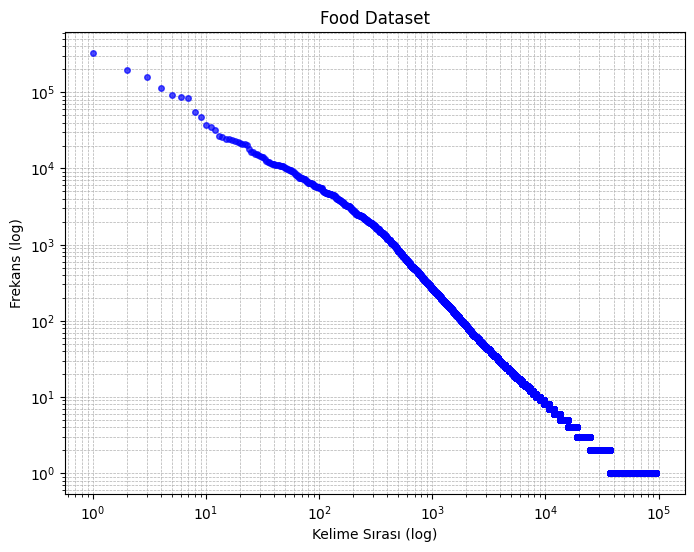

In [8]:
import nltk
import matplotlib.pyplot as plt
import numpy as np

# Metin verisini al
metin = df['text'].dropna().str.cat(sep=' ')  # Metinleri birleştiriyoruz

# Metni küçük harfe çeviriyoruz ve temizliyoruz
metin = re.sub(r'[^a-zA-Z0-9\s]', '', metin.lower())

# Kelimeleri ayırıyoruz
kelimeler = metin.split()

# Kelime frekanslarını hesaplıyoruz
word_freq = {}
for word in kelimeler:
    word_freq[word] = word_freq.get(word, 0) + 1

# Frekansları azalan şekilde sıralıyoruz
sorted_freqs = sorted(word_freq.values(), reverse=True)

# Rank (sıralama) oluşturuyoruz
ranks = np.arange(1, len(sorted_freqs) + 1)

# Log-log grafiğini çiziyoruz
plt.figure(figsize=(8, 6))
plt.loglog(ranks, sorted_freqs, marker="o", linestyle="none", markersize=4, alpha=0.7, color="b")

# Grafik etiketleri
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.title("Food Dataset")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Grafiği göster

plt.show()
